<hr>

##### Objetivos: Apresentar de forma prática,o uso de um dentre vários métodos computacionais, com o objetivo de inspirar a inclusão digital como ferramenta pedagógica 

<hr>

# Relatividade Restrita - Tempo

 - [x] Entender o tempo
 - [x] Equacionar o tempo relativo
 - [x] Graficar a dilatação temporal
 - [x] Exercitar nosso novo conhecimento
 
- ### Ferramentas utilizadas
 - Linguagem de programação PYTHON 
     - SYMPY
     - NUMPY 
     - MATPLOTLIB 
     - Nivel estimado: 
          - Programadores: 2 
          - Não programadores: 3
 - ALGEBRA BASICA 
     - Nivel estimado: 
         - Todos: 1

# O TEMPO 

<hr>

- Tempo é a duração relativa das coisas, que cria no ser humano a ideia de presente, passado e futuro
- período contínuo no qual os eventos se sucedem.

# Postulado da Luz

<hr>

- As leis da Física,são as mesmas em todos os sistemas referenciais inerciais. 
    - Ou seja, não existe nenhum sistema de referência inercial preferencial.
- A velocidade da luz no vácuo tem o mesmo valor 'C' para todos os sistemas referenciais inerciais.
    - Todos que observam o mesmo feixe de luz vêem a mesma velocidade c = 299 792 458 m/s ~= 300.000 km/s ~= 1,079*10^9 km/h
   
<hr>
 
- Transformada de Lorentz :
    $$ t' = \gamma \cdot (t - \frac{v\cdot x}{c^2})$$
    $$ x' = \gamma \cdot (x - v \cdot t) $$
    $$ y' = y $$
    $$ z' = z $$
    
    - onde $$ \gamma = \frac{1}{\sqrt{1-\frac{v^2}{c^2}}}$$

<figure>
 <img src="./imagens/AV_01.png" alt="Lorentz no trem e Einstein observando de maneira relativa" title="Trem" width="750" height="750" />
</figure>

- Velocidades: 
    - $$ \frac{m}{s} $$
- Distancias: 
    - $$ m $$
- Tempo: 
    - $$ s $$

Observador Lorentz:
$$ 2 \cdot D_m = c_\frac{m}{s} \cdot \Delta t'_s $$

Observador Einstein:  

$$ 2 \cdot l_m = c_\frac{m}{s} \cdot \Delta t_s $$

# Hora de codificar

In [1]:
#SymPy é uma biblioteca Python para computação simbólica
from __future__ import division
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### Equacionando o tempo relativo

<hr>

Triângulo retângulo: 
$$ H^{2} = CA^{2} + CO^{2} $$
juntando as equações : $$ H = l ; CA = L; CO = D$$ 
$$H = l = \frac{c \cdot \Delta t}{2}  $$
$$CA = L = \frac{\vec u \cdot \Delta t }{2}$$
$$CO = D = \frac{c \cdot \Delta t'}{2} $$

In [2]:
# variaveis
Δt,Δtt = sp.symbols("Δt Δt'")
c,u = sp.symbols("c u")

H = ((c*Δt)/2)
CA = ((u*Δt)/2)
CO = ((c*Δtt)/2)
sp.pprint(sp.Eq(H**2,CO**2 + CA**2))

 2   2    2    2    2   2
c ⋅Δt    c ⋅Δt'    u ⋅Δt 
────── = ─────── + ──────
  4         4        4   


In [3]:
f = sp.Eq((H)**2 - (CA)**2,(CO)**2)
f

Eq(c**2*Δt**2/4 - u**2*Δt**2/4, c**2*Δt'**2/4)

multiplicando os dois lados da igualdades por 4

In [4]:
f = sp.Eq(f.args[0] * 4,f.args[1]*4)
f

Eq(c**2*Δt**2 - u**2*Δt**2, c**2*Δt'**2)

multiplicando os dois lados da igualdades por $ \frac{1}{c^2} $

In [5]:
f = sp.Eq(f.args[0]*(1/c**2),f.args[1]*(1/c**2)).expand()
f

Eq(Δt**2 - u**2*Δt**2/c**2, Δt'**2)

multiplicando os dois lados da igualdades por $ \frac{1}{ \Delta t^2} $

In [6]:
f = sp.Eq(f.args[0]* 1/Δt**2,(f.args[1]*1/Δt**2)).expand()
f

Eq(1 - u**2/c**2, Δt'**2/Δt**2)

tirando a raiz nos dois lados da igualdades

In [7]:
f = sp.Eq(sp.sqrt(f.args[0]),sp.sqrt(f.args[1]))
f

Eq(sqrt(1 - u**2/c**2), sqrt(Δt'**2/Δt**2))

modulando o tempo $| \Delta t$ |

In [8]:
Δt = sp.Abs(Δt)
Δtt = sp.Abs(Δtt)

aplicando na equação

In [9]:
f = f.subs("Δt'",Δtt).subs("Δt",Δt)
f

Eq(sqrt(1 - u**2/c**2), Abs(Δt')/Abs(Δt))

multiplicando os dois lados da igualdades por $\frac{1}{\Delta t'}$

In [10]:
f = sp.Eq(f.args[0]*1/Δtt,f.args[1]*1/Δtt)
f

Eq(sqrt(1 - u**2/c**2)/Abs(Δt'), 1/Abs(Δt))

elevando os dois lados da igualdade por $ -1 $ e teremos a equação final da dilatação do tempo

In [11]:
f = sp.Eq(f.args[0]**(-1),f.args[1]**(-1))
f

Eq(Abs(Δt')/sqrt(1 - u**2/c**2), Abs(Δt))

# Graficando a dilatação temporal

<hr>

Com a equação obtida vamos codifica-la para numpy

In [12]:
Δt,Δtt = sp.symbols("Δt Δt'")
c,u = sp.symbols("c u")

In [13]:
Δt = Δtt/sp.sqrt(1 - (u**2)/(c**2))
Δt

Δt'/sqrt(1 - u**2/c**2)

convertendo para numpy e onde as entradas inseridas pelo usuário serão
    - Δtt -> tempo percebido pelo viajante
    - u -> velocidade do viajante
    - c -> velocidade da luz

In [14]:
T =  sp.lambdify((Δtt,u,c),Δt,"numpy")

In [15]:
#Teste de função
#velocidade do viajante 7 m/s, c = 299 792 458 m/s
#tempo da viajem 3 minutos = 180 segundos
#Δt = ?
t= 60 * 3
((T(t,299792457,299792458) - t) /60/60)/24
# 

25.504607474419217

In [16]:
#quantidades de amostras queremos para obter o vetor u
amostras = 4000
###############################
#c = 299 792 458 m/s ~= 300.000 km/s ~= 1,079*10^9 km/h
c = 300*10**3
Δtt = 1 # 1 segundo
###############################
u = np.linspace(0,c,amostras)
v = u[:amostras-1]

In [17]:
ΔT = T(Δtt,v,c)

- no eixo adjacente colocamos a velocidade do viajante
- no eixo vertical colocamos a variação do tempo do observador inercial

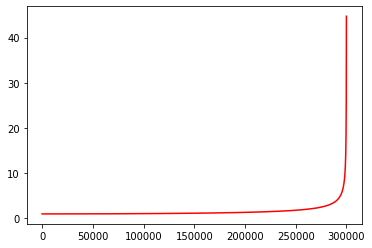

In [18]:
plt.plot(v,ΔT,'r-')

#### conclusão: 
   - Conforme a velocidade do viajante aumenta, maior é a dilatação do tempo
   - Você como viajante em altas velocidade está viajando para o futuro mais rápido do que aqueles que fazem parte do referencial inercial.
   - A dilatação do tempo tende ao infinito conforme se aproxima da velocidade da luz 
     - Se v = c temos que :
     
     - $$ \Delta t' \cdot \frac{1}{\sqrt{1-\frac{c^2}{c^2}}} = \Delta t' \cdot \frac{1}{\sqrt{1-1}} $$
     
     - $$ \Delta t' \cdot \frac{1}{\sqrt{1-1}} = \Delta t' \cdot \frac{1}{0}  $$
     
     - Sabendo que: $$ \lim_{n \to 0}\frac{1}{n} = \infty $$
     
     - Temos: $$ \Delta t' \cdot \frac{1}{0} = \Delta t' \cdot \infty = \infty $$
     
     - logo: $$ \Delta t = \infty$$

### Supondo que você não mate ninguém e sobreviva a uma interação com um campo gravitacional ou percorra em velocidades próximas a da LUZ e consiga perceber o que está ocorrendo a sua volta... 
### Você vislumbraria a relatividade, viajaria não apenas pelo espaço mais também pelo tempo de maneira mais acelerada que os observadores relativos inertes. Sempre que corre, viaja de avião ou mesmo um simples caminhar te torna um viajante do tempo, seu corpo não sente essa viajem temporal pois para você(o viajante) o tempo continua passando normal más quando se compara com o meio a sua volta você nota as mudanças. Essa relatividade dos tempos para quem está em movimento comparado a quem está como referencial inercial(parado ou em velocidade menor e constante) da o nome para a teoria do "tempo relativo" e para a definição do tempo dada no inicio deste mini artigo



### veja o video e vai ter uma ideia do quão lindo seria:

In [20]:
import IPython.display as _display
_display.Video('./videos/a_maquina_do_tempo.mp4')
# Filme: A máquina do tempo
# Data de lançamento: 8 de março de 2002 (EUA)
# Direção: Simon Wells, Gore Verbinski
# Música composta por: Klaus Badelt
# Bilheteria: 123,7 milhões USD
# Autores: H. G. Wells, David Duncan

#OBS:Baseado no Livro: The Time Machine Autor: H. G. Wells, 1895

## Atividade:

<hr>

### múon
- Partícula elementar encontrada na atmosfera terrestre

- vida_media 
$$  \approx 2,2 \cdot 10^{-6} $$ 
- com esse tempo de vida os múons deveriam decair completamente em 
$$ d_{m} = v\cdot(\Delta t) \approx (2,994 \cdot 10^8 \frac{m}{s}) \cdot (2.2\cdot 10^{-6} s) \approx 650_{m}$$

- Porém são encontrados na superfície da Terra a mais de 10 km de distância de onde foram criadas

##  Use seu conhecimento em relatividade para explicar esse fato
